In [2]:
from bottle import route, run, get, post, request
import bson
import os
import json
import re
from dotenv import load_dotenv
load_dotenv()
import datetime
from src.mongo import connectCollection
from src.sentiment import sentimentAnalyzer

In [44]:
chat_id = 0
messages = getMessages(chat_id)

In [45]:
messages

{'message_1': {'user': 'John Wick',
  'date': '2019-10-17',
  'time': '10:15:41',
  'text': 'Hey Mike, whats up??'},
 'message_2': {'user': 'Mike Wazowski',
  'date': '2019-10-17',
  'time': '10:16:59',
  'text': 'Dude!!! 😀️ Did you watch the game last night?'},
 'message_3': {'user': 'John Wick',
  'date': '2019-10-17',
  'time': '10:17:31',
  'text': 'No, had to work. How was it?'},
 'message_4': {'user': 'Mike Wazowski',
  'date': '2019-10-17',
  'time': '10:18:41',
  'text': 'Awesome! Boyander scored 3 goals!'},
 'message_5': {'user': 'John Wick',
  'date': '2019-10-17',
  'time': '10:19:41',
  'text': 'No way! 😮️'},
 'message_6': {'user': 'Mike Wazowski',
  'date': '2019-10-17',
  'time': '10:20:41',
  'text': 'Way...'},
 'message_7': {'user': 'John Wick',
  'date': '2019-10-17',
  'time': '10:21:41',
  'text': 'I bet people went crazy'},
 'message_8': {'user': 'Mike Wazowski',
  'date': '2019-10-17',
  'time': '10:22:41',
  'text': 'For sure. We stayed at KuboLoco until 6AM.'},
 

In [51]:
def sentimentAnalyzer(data):
    sid = SentimentIntensityAnalyzer()
    newdata = {}
    for key, value in data.items():
        newdata[key] = value
        newdata[key]['sentiments'] = sid.polarity_scores(value['text'])
    return newdata

In [52]:
messagesSentiment = sentimentAnalyzer(messages)
messagesSentiment

{'message_1': {'user': 'John Wick',
  'date': '2019-10-17',
  'time': '10:15:41',
  'text': 'Hey Mike, whats up??',
  'sentiments': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}},
 'message_2': {'user': 'Mike Wazowski',
  'date': '2019-10-17',
  'time': '10:16:59',
  'text': 'Dude!!! 😀️ Did you watch the game last night?',
  'sentiments': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}},
 'message_3': {'user': 'John Wick',
  'date': '2019-10-17',
  'time': '10:17:31',
  'text': 'No, had to work. How was it?',
  'sentiments': {'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.296}},
 'message_4': {'user': 'Mike Wazowski',
  'date': '2019-10-17',
  'time': '10:18:41',
  'text': 'Awesome! Boyander scored 3 goals!',
  'sentiments': {'neg': 0.0, 'neu': 0.39, 'pos': 0.61, 'compound': 0.6892}},
 'message_5': {'user': 'John Wick',
  'date': '2019-10-17',
  'time': '10:19:41',
  'text': 'No way! 😮️',
  'sentiments': {'neg': 0.555, 'neu': 0.445, 'pos': 0.0, 'compound': -0.3595

In [100]:
messagesSentiment['message_1']['sentiments']['compound']

0.0

In [102]:
compoundList = [value['sentiments']['compound'] for key,value in messagesSentiment.items()]

In [103]:
print(compoundList)

[0.0, 0.0, -0.296, 0.6892, -0.3595, 0.0, -0.34, 0.3182, -0.7088, -0.8268, 0.5574, -0.5411, -0.0772]


In [123]:
import pandas as pd
df = pd.DataFrame(compoundList, columns=['compound'])
df['message'] = [e for e in range(1,len(messagesSentiment.keys())+1)]
df['sentiments'] = ['positive' if e > 0 else ('negative' if e < 0 else 'neutral') for e in compoundList]

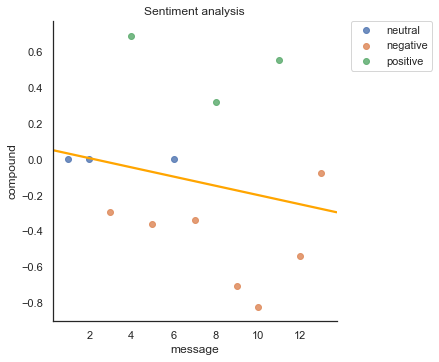

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
g = sns.lmplot(x = 'message', y= 'compound', hue='sentiments', data=df, fit_reg=False)
h = sns.regplot(x = 'message', y= 'compound', data=df, scatter=False, ax=g.axes[0, 0],
                color='orange', ci=None)
g._legend.remove()
h.set_title('Sentiment analysis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);